Intro/About

Our project tackles the problem of sending offers to the right customers to increase revenue.

The data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO(buy one get one free). Some users might not receive any offer during certain weeks.

Not all users receive the same offer, and that is the challenge to solve with this data set.


1) We have three files: portfolio.csv, transcript.csv, and profile.csv.

    - Profile data: contains 17000 records and 6 columns where each record has data about each person, their age, salary, id, when they became member on(Date)and gender and unnnamed column.

    - Portfolio data: contains 10 rows and 7 columns which contains  promotional offers that are possible to receive, and basic information about each one including the promotional type, duration of the promotion, reward, and how the promotion was distributed to customers.

    - Transcript data: has 306534 rows and  5 columns which contains the different steps of promotional offers that a customer received, channels through which offers are possible, minimum required to spend to complete an offer.


    - For each of the csv file, these steps are followed:
        * Reading the csv files, removing unnecessary columns, Data wrangling and Binning
        * Feature Engineering
        * Univariate Analysis
        * Bivariate Analysis


We have combed through the scientific data and predictions we will be comparing our Starbucks Customer data.

We decided to first clean the data. There were lots of missing values(NaN). Since most of the values were around the same, we decided to just fill the NaN values with the mean values. Next we analyzed the dataset by using a histogram, scatterplots, joint plots, and a boxplot.


,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


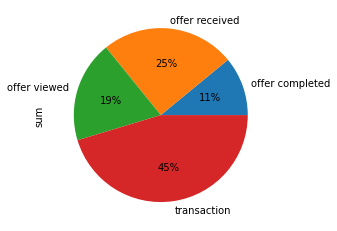

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

port = pd.read_csv("portfolio.csv")
trans = pd.read_csv("transcript.csv")
prof = pd.read_csv("profile.csv")
trans

trans2 = trans.copy()
trans2["sum"] = 1
fi, ax = plt.subplots()
trans2_plot = trans2.groupby("event").sum()["sum"].plot.pie(autopct='%.0f%%')
trans2_plot
trans


Predicting how much a customer will spend (based on the age, income, and sex):

In [6]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
df = trans.copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
df = df.merge(prof, left_on="person", right_on="id")[
    ["person", "value", "age", "income", "gender"]]
df["value"] = df["value"].str.replace("{", "", regex=True)
df["value"] = df["value"].str.replace("}", "", regex=True)
df["value"] = df["value"].str.replace("amount", "", regex=True)
df["value"] = df["value"].str.replace("id", "", regex=True)

df["value"] = df["value"].str.replace("offer", "", regex=True)
df["value"] = df["value"].str.replace(":", "", regex=True)
df["value"] = df["value"].str.replace("'", "", regex=True)
df["value"] = df["value"].str.replace("_", "", regex=True)


del df["person"]
df = df.reset_index()

df

#cleaning is done, time to implement knn



,index,value,age,income,gender
0,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
1,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,75,100000.0,F
2,2,19.89,75,100000.0,F
3,3,"9b98b8c7a33c4b65b9aebfe6a799e6d9, reward 5",75,100000.0,F
4,4,17.78,75,100000.0,F
...,...,...,...,...,...
306529,306529,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306530,306530,4d5c57ea9a6940dd891ad53e9dbe8da0,118,NaN,NaN
306531,306531,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F
306532,306532,4d5c57ea9a6940dd891ad53e9dbe8da0,58,78000.0,F


In [9]:
#Dylan do your EDA work here

import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot, plot

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Predicting how much a customer will spend based on the age, income, and sex:

In [10]:
#since we are predciting transactions, we seperate the transactions from the rest of the dataset
from sklearn.preprocessing import OneHotEncoder
from numpy import asarray
moneySpent = trans[trans["event"] == "transaction"].copy().reset_index()

#merge profile and transcript by customer id so that we have demographics of each person who made a transaction
moneySpent = moneySpent.merge(prof, left_on="person", right_on="id")[
    ["person", "value", "age", "income", "gender"]]
moneySpent["value"] = moneySpent["value"].str.replace("{", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("}", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("amount", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace(":", "", regex=True)
moneySpent["value"] = moneySpent["value"].str.replace("''", "", regex=True)
moneySpent["value"] = moneySpent["value"].astype(float)

#creating one hot encoding for gender
data = asarray([['F'], ['M'], ['O']])
print(data)

encoder = OneHotEncoder(sparse=False)

onehot = encoder.fit_transform(data)
print(onehot)

#implement onehot
moneySpent["F"] = moneySpent["gender"].copy()
moneySpent["M"] = moneySpent["gender"].copy()
moneySpent["O"] = moneySpent["gender"].copy()

moneySpent["F"] = moneySpent["F"].replace("F", 1)
moneySpent["F"] = moneySpent["F"].replace("M", 0)
moneySpent["F"] = moneySpent["F"].replace("O", 0)
moneySpent["F"] = moneySpent["F"].fillna(0)
moneySpent["F"] = moneySpent["F"].astype(int)


moneySpent["M"] = moneySpent["M"].replace("M", 1)
moneySpent["M"] = moneySpent["M"].replace("F", 0)
moneySpent["M"] = moneySpent["M"].replace("O", 0)
moneySpent["M"] = moneySpent["M"].fillna(0)
moneySpent["M"] = moneySpent["M"].astype(int)


moneySpent["O"] = moneySpent["O"].replace("O", 1)
moneySpent["O"] = moneySpent["O"].replace("M", 0)
moneySpent["O"] = moneySpent["O"].replace("F", 0)
moneySpent["O"] = moneySpent["O"].fillna(0)
moneySpent["O"] = moneySpent["O"].astype(int)


moneySpent["gender"] = moneySpent["gender"].replace("F", True)
moneySpent["gender"] = moneySpent["gender"].replace("M", True)
moneySpent["gender"] = moneySpent["gender"].replace("O", True)
moneySpent["gender"] = moneySpent["gender"].fillna(False)
moneySpent["gender"] = moneySpent["gender"].astype(bool)

#drop rows with no income
moneySpent = moneySpent.dropna(subset=["income"])

del moneySpent["person"]
moneySpent = moneySpent.reset_index()

#cleaning is done, time to implement knn


[['F']
 ['M']
 ['O']]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

train = train_test_split(moneySpent, test_size=0.2)
test = train_test_split(moneySpent, test_size=0.2)

del train[0]
display(train)
#y_train = train["value"]

#x_train = train.drop("value", axis=1)

'''x_test = test.drop("value", axis=1)
y_test = test["value"]

scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

rmse_val = [] 
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
'''


[        index  value  age   income  gender  F  M  O
 32353   35750  16.66   26  62000.0    True  0  1  0
 17219   19042  27.81   70  99000.0    True  1  0  0
 35017   38678  12.00   81  52000.0    True  1  0  0
 47102   52183   1.76   30  41000.0    True  0  1  0
 10429   11430  24.28   75  87000.0    True  0  1  0
 ...       ...    ...  ...      ...     ... .. .. ..
 96158  107026   3.90   52  62000.0    True  0  1  0
 61311   67891   4.29   35  72000.0    True  0  1  0
 70386   78047  14.74   28  48000.0    True  0  1  0
 32746   36222  13.43   55  67000.0    True  0  1  0
 16380   18103  14.54   43  60000.0    True  1  0  0
 
 [24792 rows x 8 columns]]

'x_test = test.drop("value", axis=1)\ny_test = test["value"]\n\nscaler = MinMaxScaler(feature_range=(0, 1))\n\nx_train_scaled = scaler.fit_transform(x_train)\nx_train = pd.DataFrame(x_train_scaled)\n\nx_test_scaled = scaler.fit_transform(x_test)\nx_test = pd.DataFrame(x_test_scaled)\n\nrmse_val = [] \nfor K in range(10):\n    K = K+1\n    model = neighbors.KNeighborsRegressor(n_neighbors = K)\n\n    model.fit(x_train, y_train)  #fit the model\n    pred=model.predict(x_test) #make prediction on test set\n    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse\n    rmse_val.append(error) #store rmse values\n    \n'